# Pymaceuticals Inc.
---

### Analysis

- After analyzing the data and creating visuals to display it, I was able to make some interesting conclusions about the study. The first thing I noticed is that the mice where evenly split between male and female, with 125 males and 123 females, so I was confident that gender of the mice did not skew the data. I found that mouse weight and tumor volume had a strong correlation of .84, which told me that larger mice had more tumors. This could mean that larger mice require larger doses of the drugs, instead of giving the same dose of drug to every mouse regardless of their size. 
 

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import iqr
import numpy as np
import random

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [151]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [152]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [153]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [154]:
# Optional: Get all the data for the duplicate mouse ID. 


In [155]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(combined_df[combined_df['Mouse ID'] == 'g989'].index)
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [156]:
# Checking the number of mice in the clean DataFrame.
clean_df_count = clean_df["Mouse ID"].nunique()
clean_df_count

248

## Summary Statistics

In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_table = pd.DataFrame({"Mean":mean, "Median":median, "Variance":var, "Standard_Dev":std, "Standard_Error":sem})

summary_table


,Mean,Median,Variance,Standard_Dev,Standard_Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_table0 = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table0

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [159]:
regimen_group = clean_df.groupby('Drug Regimen')

## Bar and Pie Charts

Text(0.5, 1.0, 'Mice Count By Treatment')

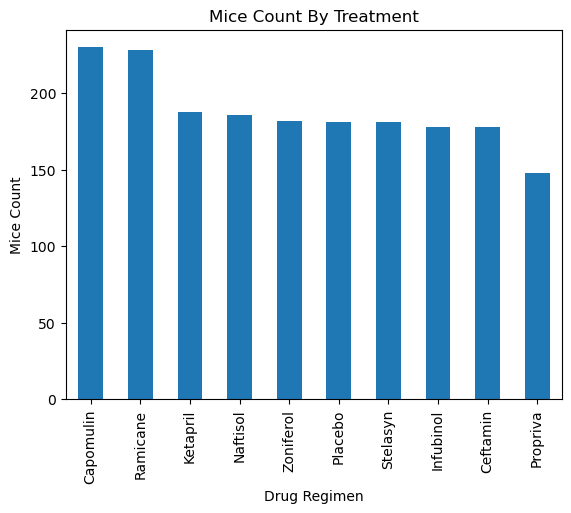

In [160]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()

mice_plot = mice_count.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.title("Mice Count By Treatment")


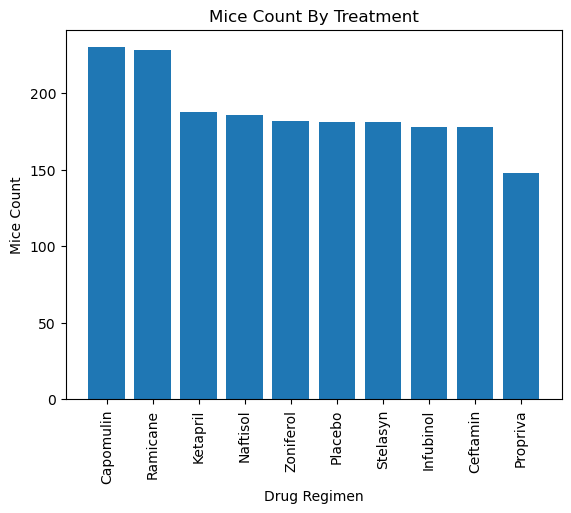

In [161]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x = mice_count.index.values
y = mice_count.values


plt.bar(x, y)


plt.title("Mice Count By Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.xticks(rotation="vertical")

plt.show()


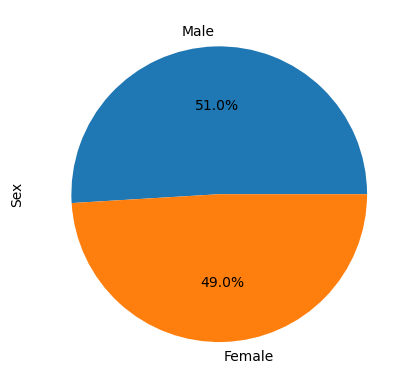

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_gender_data = clean_df["Sex"].value_counts().plot.pie(autopct= "%1.1f%%")


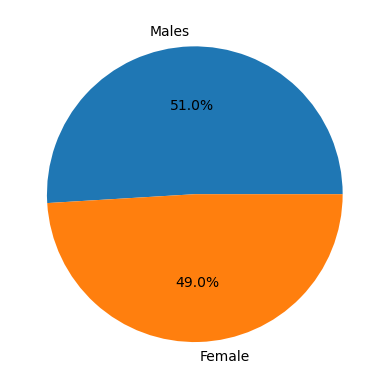

In [163]:
plt_gender_data = plt.pie(clean_df["Sex"].value_counts(),labels = ['Males', 'Female'],autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [164]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse#


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [165]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()

In [166]:
last_timepoint = last_timepoint.reset_index()
last_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [167]:
merged_drug_data = last_timepoint.merge(clean_df, on = ["Mouse ID", "Timepoint"], how='left')

In [168]:
capomulin = pd.merge(clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID").max()["Timepoint"],
                    clean_df, on = ('Mouse ID', "Timepoint"), how='left')
capomulin.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [169]:
ramicane = pd.merge(clean_df.loc[clean_df["Drug Regimen"]=="Ramicane",:].groupby("Mouse ID").max()["Timepoint"],
                     clean_df, on = ('Mouse ID', "Timepoint"), how='left')
ramicane.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [170]:
infubinol = pd.merge(clean_df.loc[clean_df["Drug Regimen"]=="Infubinol",:].groupby("Mouse ID").max()["Timepoint"],
                     clean_df, on = ('Mouse ID', "Timepoint"), how='left')
infubinol.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [171]:
ceftamin = pd.merge(clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin",:].groupby("Mouse ID").max()["Timepoint"],
                     clean_df, on = ('Mouse ID', "Timepoint"), how='left')
ceftamin.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [172]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_drug_data.loc[merged_drug_data["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    

In [173]:
#Check that the list has all 4 drugs
tumor_volume

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [174]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_tumors = capomulin["Tumor Volume (mm3)"]
capomulin_iqr = iqr(capomulin_tumors)
capomulin_q1 = np.percentile(capomulin_tumors, 25, interpolation = "midpoint")
capomulin_q3 = np.percentile(capomulin_tumors, 75, interpolation = "midpoint")
capomulin_outliers = []
for _, volume in capomulin_tumors.items():
    if volume > capomulin_q3 + (1.5*capomulin_iqr) or volume < capomulin_q1 - (1.5*capomulin_iqr):
        capomulin_outliers.append(volume)

        
ramicane_tumors = ramicane["Tumor Volume (mm3)"]
ramicane_iqr = iqr(ramicane_tumors)
ramicane_q1 = np.percentile(ramicane_tumors, 25, interpolation = "midpoint")
ramicane_q3 = np.percentile(ramicane_tumors, 75, interpolation = "midpoint")
ramicane_outliers = []
for _, volume in ramicane_tumors.items():
    if volume > ramicane_q3 + (1.5*ramicane_iqr) or volume < ramicane_q1 - (1.5*ramicane_iqr):
        capomulin_outliers.append(volume)

        
infubinol_tumors = infubinol["Tumor Volume (mm3)"]
infubinol_iqr = iqr(infubinol_tumors)
infubinol_q1 = np.percentile(infubinol_tumors, 25, interpolation = "midpoint")
infubinol_q3 = np.percentile(infubinol_tumors, 75, interpolation = "midpoint")
infubinol_outliers = []
for _, volume in infubinol_tumors.items():
    if volume > infubinol_q3 + (1.5*infubinol_iqr) or volume < infubinol_q1 - (1.5*infubinol_iqr):
        infubinol_outliers.append(volume)
        
        
ceftamin_tumors = ceftamin["Tumor Volume (mm3)"]
ceftamin_iqr = iqr(ceftamin_tumors)
ceftamin_q1 = np.percentile(ceftamin_tumors, 25, interpolation = "midpoint")
ceftamin_q3 = np.percentile(ceftamin_tumors, 75, interpolation = "midpoint")
ceftamin_outliers = []
for _, volume in ceftamin_tumors.items():
    if volume > ceftamin_q3 + (1.5*ceftamin_iqr) or volume < ceftamin_q1 - (1.5*ceftamin_iqr):
        ceftamin_outliers.append(volume)        

In [175]:
#Show the outliers
print("Capomulins Potential Outliers: ",capomulin_outliers)
print("Ramicanes Potential Outliers: ",ramicane_outliers)
print("Infubinol Potential Outliers: ",infubinol_outliers)
print("Ceftamin Potential Outliers: ",ceftamin_outliers)

Capomulins Potential Outliers:  []
Ramicanes Potential Outliers:  []
Infubinol Potential Outliers:  [36.3213458]
Ceftamin Potential Outliers:  []


In [176]:
merged_drug_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [177]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

boxplot_list = []




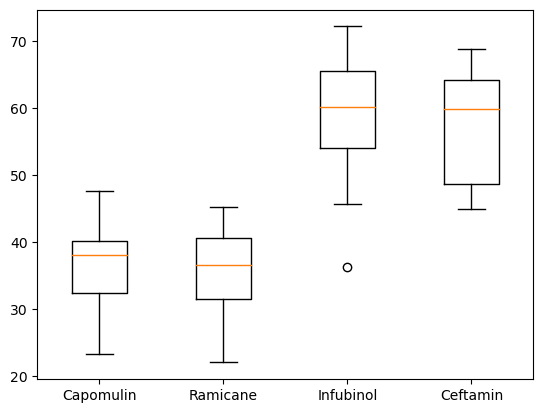

In [178]:
plt.boxplot(tumor_volume, labels = drug_list)
plt.show()

## Line and Scatter Plots

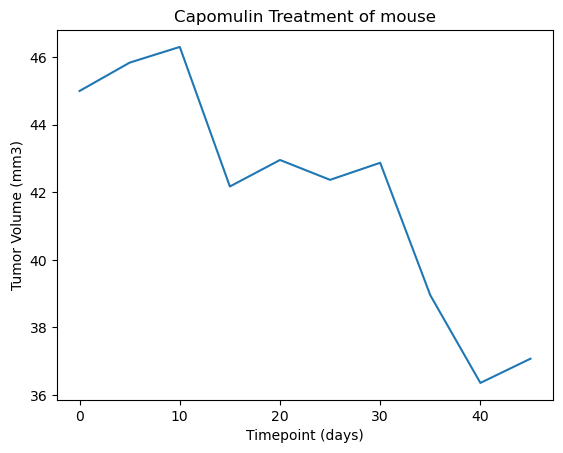

In [179]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_group = regimen_group.get_group('Capomulin')


#Choose a random mouse that took Capomulin 

ran_mouse = clean_df[clean_df['Mouse ID'] == 'g288']

#plot timepoint vs tumor vol for random mouse
plt.title(f'Capomulin Treatment of mouse')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(ran_mouse['Timepoint'], ran_mouse['Tumor Volume (mm3)'])

plt.show()


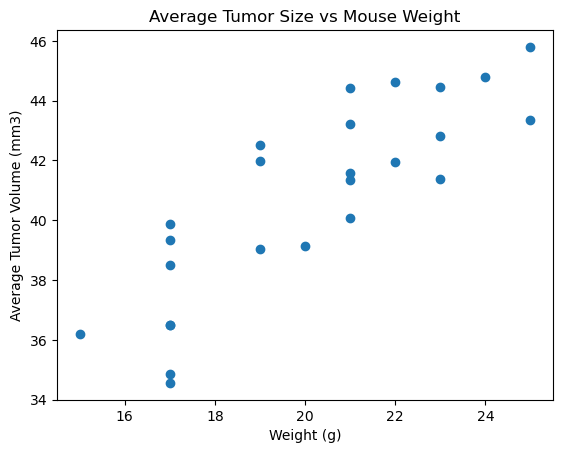

In [180]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(Capomulin_group.groupby('Mouse ID').mean()['Weight (g)'], Capomulin_group.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Size vs Mouse Weight')


plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  {0.84}


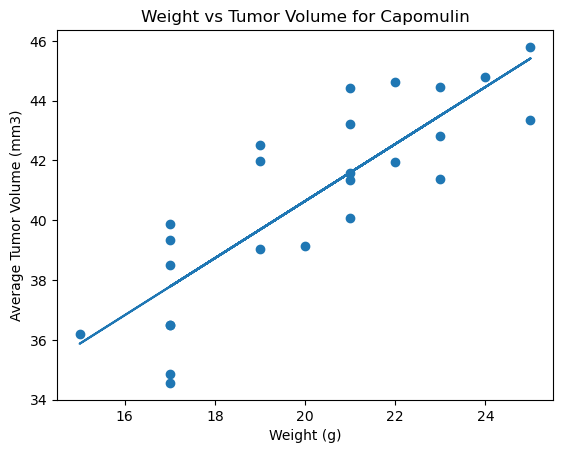

In [181]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model

correlation = st.pearsonr(Capomulin_group.groupby('Mouse ID').mean()['Weight (g)'], 
                          Capomulin_group.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])

print("The correlation between mouse weight and the average tumor volume is ", {round(correlation[0],2)})

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(Capomulin_group.groupby('Mouse ID').mean()['Weight (g)'],
                                                       Capomulin_group.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
regression_values=Capomulin_group.groupby('Mouse ID').mean()['Weight (g)']* slope + intercept
line= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(Capomulin_group.groupby('Mouse ID').mean()['Weight (g)'],
            Capomulin_group.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
plt.plot(Capomulin_group.groupby('Mouse ID').mean()['Weight (g)'],
         regression_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()


